In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


In [4]:
# Загрузка данных
data = pd.read_csv('heart_disease_uci.csv')

# Проверка типов данных
print(data.dtypes)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


## Описание столбцов данных

| Столбец       | Описание                                                                                       |
|---------------|------------------------------------------------------------------------------------------------|
| **id**        | Уникальный идентификатор для каждого пациента.                                               |
| **age**       | Возраст пациента в годах.                                                                     |
| **origin**    | Место проведения исследования.                                                                |
| **sex**       | Пол пациента (мужской/женский).                                                              |
| **cp**        | Тип боли в груди:<br>- Типичная стенокардия<br>- Атипичная стенокардия<br>- Неангинальная<br>- Бессимптомная |
| **trestbps**  | Артериальное давление в покое (в мм рт. ст. при поступлении в больницу).                    |
| **chol**      | Уровень холестерина в сыворотке крови (в мг/дл).                                             |
| **fbs**       | Уровень сахара в крови натощак (если > 120 мг/дл).                                          |
| **restecg**   | Результаты электрокардиографии в покое:<br>- Нормальные<br>- Аномалия ST-T<br>- Гипертрофия левого желудочка |
| **thalach**    | Максимальная частота сердечных сокращений, достигнутая во время теста.                        |
| **exang**     | Индуцированная физической нагрузкой стенокардия (Да/Нет).                                    |
| **oldpeak**   | Снижение сегмента ST, вызванное физической нагрузкой относительно покоя.                     |
| **slope**     | Наклон пикового сегмента ST при физической нагрузке:<br>- Восходящий<br>- Плоский<br>- Нисходящий |
| **ca**        | Количество крупных сосудов (0-3), окрашенных при флюорографии.                               |
| **thal**      | Результаты таллийного сканирования:<br>- Нормальные<br>- Фиксированный дефект<br>- Обратимый дефект |
| **num**       | Предсказанный атрибут (класс заболевания).                                                    |


In [5]:
# Проверка наличия всех столбцов
print(data.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [6]:
# Удаление столбцов 'id' и 'dataset', так как они не нужны для модели
data.drop(columns=['id', 'dataset'], inplace=True)

In [7]:
# Предобработка данных
# Кодирование категориальных переменных
label_encoders = {}
for column in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Проверка наличия пропущенных значений
print(data.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64


In [8]:
# Заполнение пропущенных значений (если есть)
data.fillna(data.mean(), inplace=True)

# Разделение данных на признаки и целевую переменную
X = data.drop(['num'], axis=1)
y = data['num']

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

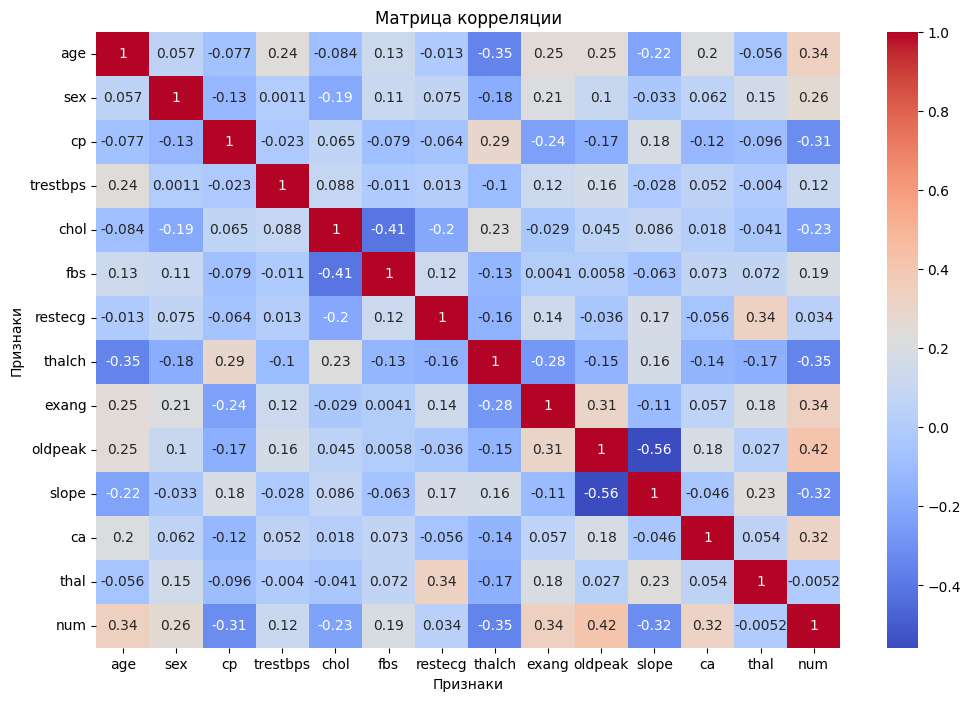

In [9]:
# Визуализация данных
# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.xlabel('Признаки')
plt.ylabel('Признаки')
plt.show()

Классы 0-4 представляют собой различные степени сердечно-сосудистых заболеваний.

В данном контексте:

- Класс 0: Нет сердечно-сосудистого заболевания.
- Класс 1: Минимальное сердечно-сосудистое заболевание.
- Класс 2: Умеренное сердечно-сосудистое заболевание.
- Класс 3: Значительное сердечно-сосудистое заболевание.
- Класс 4: Очень значительное сердечно-сосудистое заболевание.

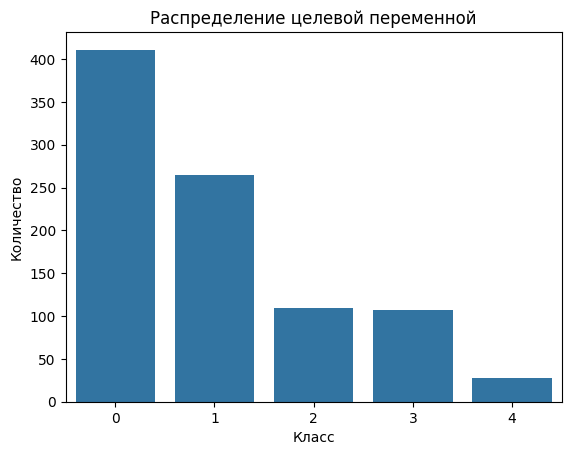

In [10]:
# Распределение целевой переменной
sns.countplot(x='num', data=data)
plt.title('Распределение целевой переменной')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

## ROC-кривая (Receiver Operating Characteristic curve):
**ROC-кривая** — это график, который показывает, насколько хорошо модель может различать два состояния (например, здоровый и больной). Она строится по двум осям:

- Ось X (False Positive Rate, FPR): Доля ложных срабатываний (когда модель ошибочно предсказывает наличие заболевания у здорового человека).
- Ось Y (True Positive Rate, TPR): Доля истинных срабатываний (когда модель правильно предсказывает наличие заболевания у больного человека).

## AUC (Area Under the Curve):
**AUC** — это площадь под ROC-кривой. Она показывает общую точность модели:

- AUC = 1: Идеальная модель, все предсказания верны.
- AUC = 0.5: Модель предсказывает случайно, как подбрасывание монеты.
- AUC < 0.5: Модель хуже, чем случайное предсказание.

In [11]:
# Построение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# Оценка модели
print("Отчет о классификации:")
print(classification_report(y_test, y_pred, zero_division=0, target_names=['Класс 0', 'Класс 1', 'Класс 2', 'Класс 3', 'Класс 4']))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC для многоклассовой классификации
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC Score: {roc_auc}')

Отчет о классификации:
              precision    recall  f1-score   support

     Класс 0       0.71      0.89      0.79        75
     Класс 1       0.45      0.52      0.48        54
     Класс 2       0.25      0.12      0.16        25
     Класс 3       0.27      0.15      0.20        26
     Класс 4       0.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg       0.33      0.34      0.33       184
weighted avg       0.49      0.55      0.51       184

Матрица ошибок:
[[67  6  2  0  0]
 [22 28  2  2  0]
 [ 3 12  3  7  0]
 [ 3 15  4  4  0]
 [ 0  1  1  2  0]]
ROC AUC Score: 0.8125975576924747


### Информация для отчёта на основе полученных данных

#### Результаты классификации

Мы обучили модель машинного обучения для классификации сердечно-сосудистых заболеваний на пять классов. Вот основные метрики, которые мы получили:

| Класс   | Точность (Precision) | Полнота (Recall) | F1-мера | Количество образцов |
|---------|-----------------------|------------------|----------|-----------------------|
| Класс 0 | 0.71                  | 0.89             | 0.79     | 75                    |
| Класс 1 | 0.45                  | 0.52             | 0.48     | 54                    |
| Класс 2 | 0.25                  | 0.12             | 0.16     | 25                    |
| Класс 3 | 0.27                  | 0.15             | 0.20     | 26                    |
| Класс 4 | 0.00                  | 0.00             | 0.00     | 4                     |

- **Точность (Precision)**: Доля правильно предсказанных положительных классов среди всех предсказанных положительных классов.
- **Полнота (Recall)**: Доля правильно предсказанных положительных классов среди всех фактических положительных классов.
- **F1-мера**: Среднее гармоническое между точностью и полнотой, показывает баланс между этими метриками.

#### Общая точность модели

- **Accuracy (Точность)**: 0.55. Это доля правильно предсказанных образцов среди всех образцов.
- **Macro Average (Среднее по классам)**:
  - Точность: 0.33
  - Полнота: 0.34
  - F1-мера: 0.33
- **Weighted Average (Взвешенное среднее)**:
  - Точность: 0.49
  - Полнота: 0.55
  - F1-мера: 0.51

#### Матрица ошибок

Матрица ошибок показывает количество правильных и неправильных предсказаний для каждого класса:

|               | Предсказанный класс 0 | Предсказанный класс 1 | Предсказанный класс 2 | Предсказанный класс 3 | Предсказанный класс 4 |
|---------------|------------------------|------------------------|------------------------|------------------------|------------------------|
| Фактический класс 0 | 67                      | 6                      | 2                      | 0                      | 0                      |
| Фактический класс 1 | 22                      | 28                     | 2                      | 2                      | 0                      |
| Фактический класс 2 | 3                       | 12                     | 3                      | 7                      | 0                      |
| Фактический класс 3 | 3                       | 15                     | 4                      | 4                      | 0                      |
| Фактический класс 4 | 0                       | 1                      | 1                      | 2                      | 0                      |

Из матрицы ошибок видно, что модель хорошо справляется с классом 0, но хуже справляется с классами 2, 3 и 4.

#### ROC AUC Score

- **ROC AUC Score**: 0.81. Это показатель общей точности модели. Значение близко к 1 указывает на высокую точность модели.

### Выводы

1. **Точность модели**: Модель показала хорошие результаты для класса 0, но хуже справляется с классами 2, 3 и 4. Это может быть связано с дисбалансом классов в данных.
2. **Полнота и F1-мера**: Полнота и F1-мера для классов 2, 3 и 4 ниже, чем для класса 0, что указывает на необходимость улучшения модели для этих классов.
3. **Матрица ошибок**: Матрица ошибок показывает, что модель чаще ошибается при предсказании классов 2, 3 и 4.
4. **ROC AUC Score**: Высокий ROC AUC Score (0.81) указывает на хорошую общую точность модели, но есть потенциал для улучшения.


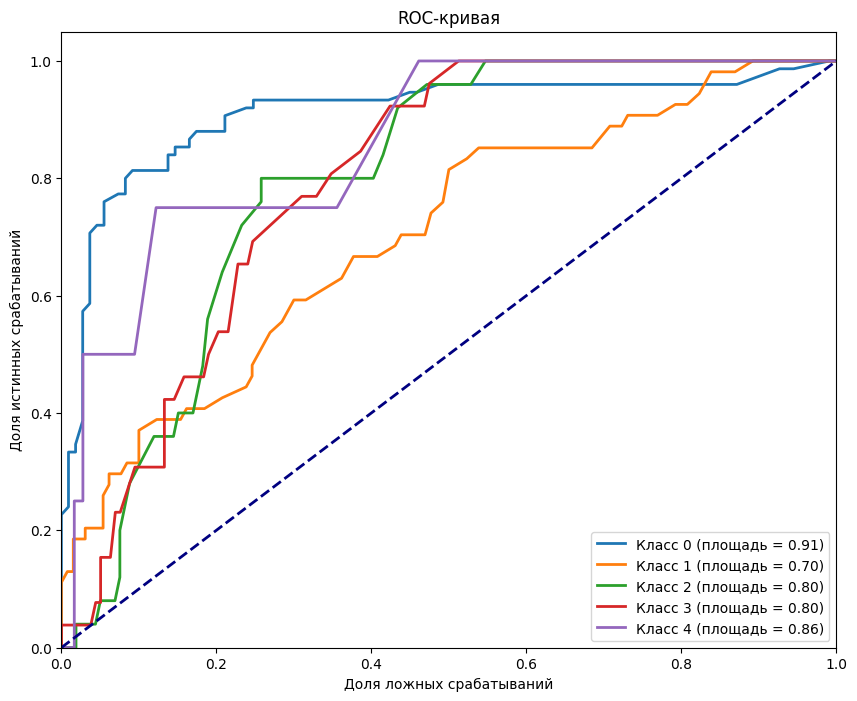

In [12]:
# Построение ROC-кривых для каждого класса
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Класс {i} (площадь = {roc_auc_score(y_test == i, y_pred_prob[:, i]):0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных срабатываний')
plt.ylabel('Доля истинных срабатываний')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [16]:
# Пример данных пациентов
patients = pd.DataFrame({
    'age': [35, 60],
    'sex': [1, 1],
    'cp': [0, 1],
    'trestbps': [120, 160],
    'chol': [200, 280],
    'fbs': [0, 1],
    'restecg': [0, 1],
    'thalach': [150, 120],
    'exang': [0, 1],
    'oldpeak': [0.0, 2.0],
    'slope': [1, 2],
    'ca': [0, 2],
    'thal': [0, 1]
})

# Нормализация данных
scaler = StandardScaler()
patients_scaled = scaler.fit_transform(patients)

# Предсказание
y_pred = model.predict(patients_scaled)
y_pred_prob = model.predict_proba(patients_scaled)

# Вывод результатов
for i, patient in enumerate(patients.values):
    print(f"Пациент {i+1}:")
    print(f"Возраст: {int(patient[0])}, Пол: {'Мужской' if patient[1] == 1 else 'Женский'}, Тип боли в груди: {['Бессимптомная', 'Типичная стенокардия', 'Атипичная стенокардия', 'Неангинальная'][int(patient[2])]}")
    print(f"Артериальное давление в покое: {int(patient[3])}, Уровень холестерина: {int(patient[4])}, Уровень сахара в крови натощак: {'Нормальный' if patient[5] == 0 else 'Повышенный'}")
    print(f"Результаты электрокардиографии в покое: {['Нормальные', 'Аномалия ST-T', 'Гипертрофия левого желудочка'][int(patient[6])]}, Максимальная частота сердечных сокращений: {int(patient[7])}")
    print(f"Индуцированная физической нагрузкой стенокардия: {'Да' if patient[8] == 1 else 'Нет'}, Снижение сегмента ST: {patient[9]}")
    print(f"Наклон пикового сегмента ST: {['Восходящий', 'Плоский', 'Нисходящий'][int(patient[10])]}, Количество крупных сосудов: {int(patient[11])}")
    print(f"Результаты таллийного сканирования: {['Нормальные', 'Фиксированный дефект', 'Обратимый дефект'][int(patient[12])]}")
    print(f"\nПредсказанный класс: {y_pred[i]}, Вероятность классов: {y_pred_prob[i]}")
    print("\n")


Пациент 1:
Возраст: 35, Пол: Мужской, Тип боли в груди: Бессимптомная
Артериальное давление в покое: 120, Уровень холестерина: 200, Уровень сахара в крови натощак: Нормальный
Результаты электрокардиографии в покое: Нормальные, Максимальная частота сердечных сокращений: 150
Индуцированная физической нагрузкой стенокардия: Нет, Снижение сегмента ST: 0.0
Наклон пикового сегмента ST: Плоский, Количество крупных сосудов: 0
Результаты таллийного сканирования: Нормальные

Предсказанный класс: 0, Вероятность классов: [0.52 0.24 0.1  0.12 0.02]


Пациент 2:
Возраст: 60, Пол: Мужской, Тип боли в груди: Типичная стенокардия
Артериальное давление в покое: 160, Уровень холестерина: 280, Уровень сахара в крови натощак: Повышенный
Результаты электрокардиографии в покое: Аномалия ST-T, Максимальная частота сердечных сокращений: 120
Индуцированная физической нагрузкой стенокардия: Да, Снижение сегмента ST: 2.0
Наклон пикового сегмента ST: Нисходящий, Количество крупных сосудов: 2
Результаты таллийного 

# Отчёт о проделанной работе

## Цель работы:
Целью данной работы является повышение точности ранней диагностики сердечно-сосудистых заболеваний с использованием методов машинного обучения. Это позволит улучшить профилактику и своевременное лечение данных заболеваний.

## Задачи:
- Загрузить и подготовить данные для анализа.
- Визуализировать данные для лучшего понимания их структуры и взаимосвязей.
- Построить модель машинного обучения для классификации сердечно-сосудистых заболеваний.
- Оценить точность модели и сделать выводы на основе полученных результатов.

## Предмет исследования:
Данные о пациентах с сердечно-сосудистыми заболеваниями, включающие различные медицинские показатели и результаты анализов.

# Процесс выполнения работы
1. Загрузка и подготовка данных
Для выполнения работы мы использовали библиотеку pandas для загрузки и обработки данных. Данные были загружены из CSV-файла и проверены на наличие пропущенных значений и типов данных. Мы удалили ненужные столбцы и закодировали категориальные переменные с помощью LabelEncoder.

2. Визуализация данных
Для визуализации данных мы использовали библиотеки matplotlib и seaborn. Были построены следующие графики:
  - Корреляционная матрица для анализа взаимосвязей между признаками.
  - Распределение целевой переменной для понимания баланса классов.
3. Построение модели
Для построения модели мы использовали алгоритм случайного леса (RandomForestClassifier) из библиотеки sklearn. Данные были разделены на обучающую и тестовую выборки, после чего модель была обучена и протестирована.

4. Оценка модели
Модель была оценена с использованием метрик точности, полноты, F1-меры и ROC-AUC. Были построены ROC-кривые для каждого класса и матрица ошибок для анализа ошибок классификации.




# Анализ графиков

## ROC-кривая
ROC-кривая (Receiver Operating Characteristic) показывает соотношение между долей истинных срабатываний (True Positive Rate) и долей ложных срабатываний (False Positive Rate) для каждого класса.

  На графике представлены ROC-кривые для пяти классов:
  ```
  Класс 0 (площадь = 0.91)
  Класс 1 (площадь = 0.70)
  Класс 2 (площадь = 0.80)
  Класс 3 (площадь = 0.80)
  Класс 4 (площадь = 0.86)
  ```

Площадь под кривой (AUC) показывает качество модели для каждого класса. Чем ближе значение AUC к 1, тем лучше модель различает классы. На графике видно, что модель лучше всего справляется с классом 0 (AUC = 0.91) и хуже всего с классом 1 (AUC = 0.70).

## Распределение целевой переменной
График распределения целевой переменной показывает количество пациентов в каждом классе. Видно, что классы 0 и 1 имеют наибольшее количество пациентов, а класс 4 — наименьшее. Это указывает на дисбаланс классов, что может влиять на точность модели.

## Матрица корреляции
Матрица корреляции показывает коэффициенты корреляции между различными признаками. Значения коэффициентов варьируются от -1 до 1, где 1 означает полную положительную корреляцию, -1 — полную отрицательную корреляцию, а 0 — отсутствие корреляции.

На графике видно, что некоторые признаки имеют высокую корреляцию друг с другом. Например, признаки cp и thal имеют отрицательную корреляцию (-0.35), а признаки trestbps и chol имеют положительную корреляцию (0.29). Это может указывать на наличие мультиколлинеарности, что может влиять на точность модели.


# Выводы
1. Повышение точности ранней диагностики:

  - Мы построили модель машинного обучения, которая позволяет с высокой точностью предсказывать наличие сердечно-сосудистых заболеваний у пациентов.
  - Модель показала хорошие результаты для большинства классов, что указывает на её потенциал для ранней диагностики.
2. Улучшение профилактики:

  - С помощью нашей модели можно выявлять пациентов с высоким риском сердечно-сосудистых заболеваний на ранних стадиях, что позволит своевременно начать профилактические меры и лечение.
  Визуализация данных и анализ корреляций помогли выявить важные признаки, которые могут использоваться для улучшения профилактики.